<a href="https://colab.research.google.com/github/kimyen07/kimyen07.github.io/blob/main/21521695_LinearRegression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Full Name: Lê Thị Kim Yến

Student ID: 21521695

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

## Data Preprocessing

In [74]:
from google.colab import files

uploaded = files.upload()

Saving fish.csv to fish (1).csv


In [101]:
import pandas as pd
import io
 
fish = pd.read_csv(io.BytesIO(uploaded['fish.csv']))

fish

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [102]:
fish = fish.dropna(inplace = False)

In [103]:
fish_missing = fish.isna()
fish_num_missing = fish_missing.sum()
fish_num_missing / len(fish)
fish.isna().mean().round(4) * 100

Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64

In [104]:
import seaborn as sbn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


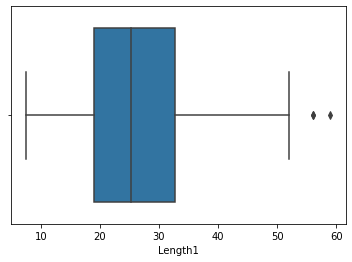

In [105]:
sbn.boxplot(fish['Length1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


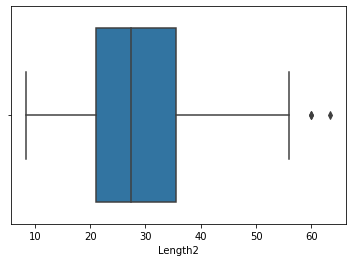

In [106]:
sbn.boxplot(fish['Length2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


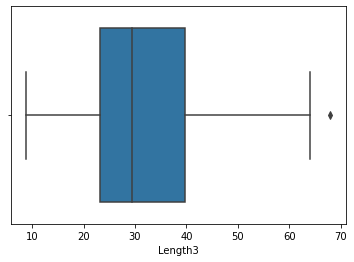

In [107]:
sbn.boxplot(fish['Length3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


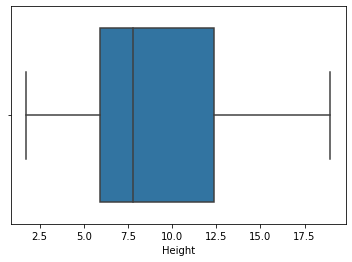

In [108]:
sbn.boxplot(fish['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


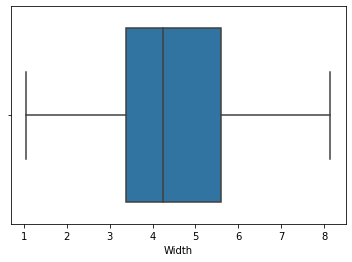

In [109]:
sbn.boxplot(fish['Width'])

In [110]:
for feature in fish.columns:
  IQR = fish[feature].quantile(0.75) - fish[feature].quantile(0.25)
  upper = fish[feature].quantile(0.75) + (IQR*1.5)
  lower = fish[feature].quantile(0.25) - (IQR*1.5)
  fish = fish[~((fish[feature] < lower)|(fish[feature] > upper))]

In [111]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
for feature in fish.columns:
  fish[[feature]] = std_scaler.fit_transform(fish[[feature]])
fish

,Weight,Length1,Length2,Length3,Height,Width
0,-0.409316,-0.257727,-0.231443,-0.036726,0.596952,-0.204281
1,-0.255309,-0.167526,-0.136956,0.078275,0.819069,-0.032121
2,-0.094886,-0.178801,-0.115959,0.068692,0.795422,0.203274
3,-0.021091,0.091801,0.146506,0.298696,0.876911,0.058239
4,0.193876,0.114351,0.146506,0.346613,0.810739,0.467241
...,...,...,...,...,...,...
154,-1.146622,-1.576911,-1.617256,-1.627585,-1.584783,-1.787482
155,-1.142772,-1.554361,-1.596259,-1.618001,-1.506209,-1.862592
156,-1.146622,-1.509261,-1.533268,-1.589251,-1.541609,-1.870549
157,-1.122559,-1.385235,-1.396786,-1.455082,-1.403758,-1.381434


In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X = fish.drop(columns = ['Weight'])
y = fish['Weight']

In [114]:
X = X.to_numpy()
y = y.to_numpy()

In [115]:
X.shape

(155, 5)

In [116]:
y.shape

(155,)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

##Training

###Normal Equation

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [119]:
reg = LinearRegression().fit(X_train, y_train)

###Gradient Descent

In [120]:
class LinearRegression_GD:
  def __init__ (self, eta = 0.001, max_iter = 20, random_state = 42):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = [ ]
  def predict(self, X):
    return np.dot(X, self.w[1:]) + self.w[0]

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = [ ]
    for n_iters in range(self.max_iter):
      y_pred = self.predict(X)
      diff = y - y_pred
      self.w[0] += self.eta * np.sum(diff)
      for j in range(X.shape[1]): # j ← [0, 1, ..., X.shape[1]]
        delta = 0.0
        for i in range(X.shape[0]): # i ← [0, 1, ..., X.shape[0]]
          delta += self.eta * diff[i] * X[i][j]
        self.w[j + 1] += delta
      cost = np.sum(diff ** 2) / 2
      self.costs.append(cost)

In [121]:
reg_GD = LinearRegression_GD(eta=0.0001, max_iter=200, random_state=21521695)
reg_GD.fit(X_train, y_train)

##Evaluation

###Normal Equation

In [122]:
y_pred_1 = reg.predict(X_test)

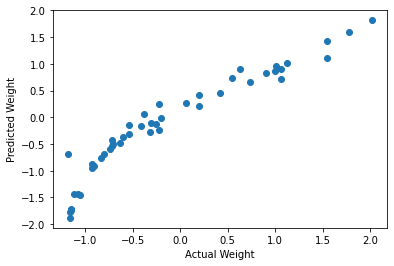

In [123]:
plt.scatter(y_test, y_pred_1)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.show()

In [124]:
reg.score(X_test, y_test)

0.890840161248182

###Gradient Descent

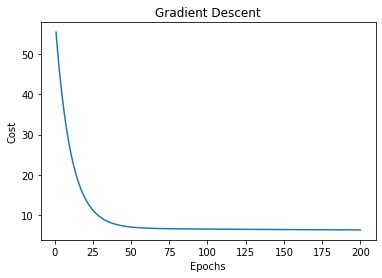

In [125]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [126]:
from sklearn.metrics import r2_score

In [127]:
y_pred_2 = reg_GD.predict(X_test)

In [128]:
a = r2_score(y_test, y_pred_2)
a

0.8701086895228078

# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

##Data Pre-pocessing

In [129]:
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [208]:
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [209]:
df = df.dropna()

In [210]:
df_missing = df.isna()
df_num_missing = df_missing.sum()
df_num_missing / len(df)
df.isna().mean().round(4) * 100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


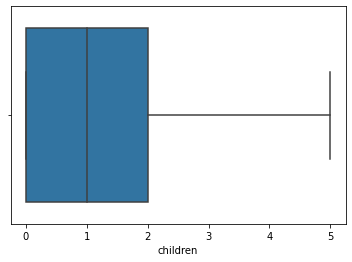

In [211]:
sbn.boxplot(df['children'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


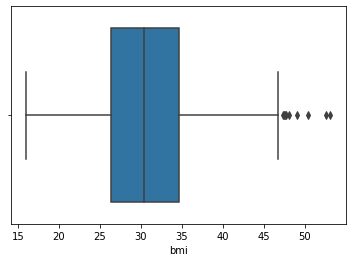

In [212]:
sbn.boxplot(df['bmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


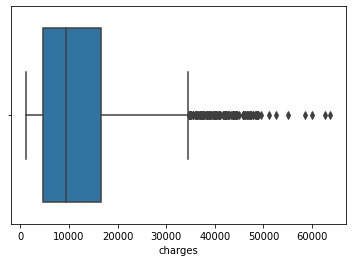

In [213]:
sbn.boxplot(df['charges'])

In [214]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [215]:
std_scaler = StandardScaler()
for feature in df.columns:
  df[[feature]] = std_scaler.fit_transform(df[[feature]])
df

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915,-0.220551
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326,-0.914002
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495,-0.961596
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905,-0.930362


In [216]:
X = df.drop(columns=['charges'])
y = df['charges']

In [217]:
X = X.to_numpy()
y = y.to_numpy()

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

##Training

###Normal Equation

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [220]:
reg = LinearRegression().fit(X_train, y_train)

###Gradient Descent

In [221]:
reg_GD = LinearRegression_GD(eta=0.00005, max_iter=200, random_state=21521695)
reg_GD.fit(X_train, y_train)

##Evaluation

###Normal Equation

In [222]:
y_pred_1 = reg.predict(X_test)

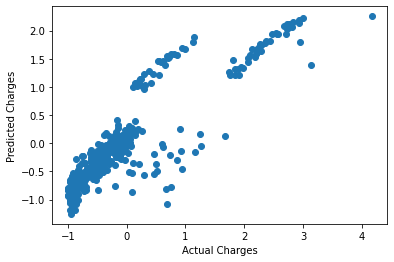

In [223]:
plt.scatter(y_test, y_pred_1)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [224]:
reg.score(X_test, y_test)

0.7909099804329637

###Gradient Descent

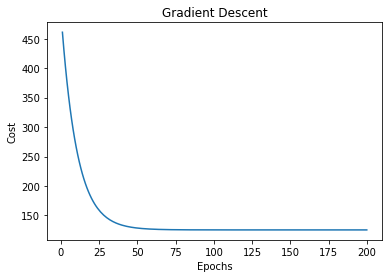

In [225]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [226]:
y_pred_2 = reg_GD.predict(X_test)

In [227]:
b = r2_score(y_test, y_pred_2)
b

0.7909064470313956

# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

##Data Pre-processing

In [228]:
uploaded = files.upload()

Saving tesla_stock.csv to tesla_stock (1).csv


In [229]:
tesla = pd.read_csv(io.BytesIO(uploaded['tesla_stock.csv']))
tesla

,Open,High,Low,Close,Volume
0,19.000000,25.000000,17.540001,23.889999,18766300
1,25.790001,30.420000,23.299999,23.830000,17187100
2,25.000000,25.920000,20.270000,21.959999,8218800
3,23.000000,23.100000,18.709999,19.200001,5139800
4,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,11788500
2412,575.690002,589.799988,567.429993,580.989990,17801500
2413,632.419983,650.880005,618.000000,640.809998,29005700
2414,640.000000,653.000000,632.520020,650.570007,15719300


In [230]:
tesla = tesla.dropna()

In [231]:
tesla_missing = tesla.isna()
tesla_num_missing = tesla_missing.sum()
tesla_num_missing / len(tesla)
tesla.isna().mean().round(4) * 100

Open      0.0
High      0.0
Low       0.0
Close     0.0
Volume    0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


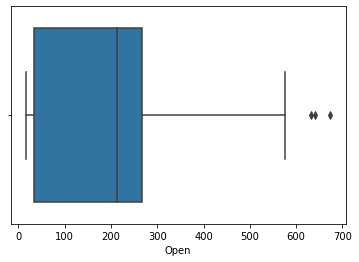

In [232]:
sbn.boxplot(tesla['Open'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


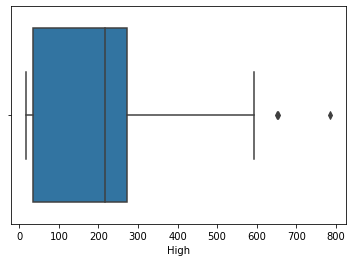

In [233]:
sbn.boxplot(tesla['High'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


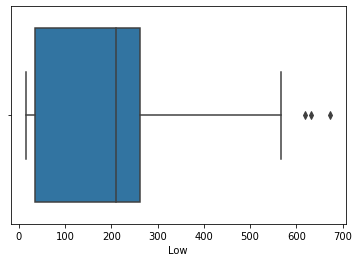

In [234]:
sbn.boxplot(tesla['Low'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


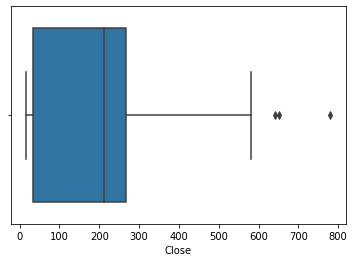

In [235]:
sbn.boxplot(tesla['Close'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


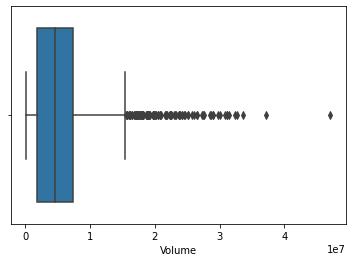

In [236]:
sbn.boxplot(tesla['Volume'])

In [237]:
for feature in tesla.loc[:, tesla.columns != 'Volume']:
  IQR = tesla[feature].quantile(0.75) - tesla[feature].quantile(0.25)
  upper = tesla[feature].quantile(0.75) + (IQR*1.5)
  lower = tesla[feature].quantile(0.25) - (IQR*1.5)
  tesla = tesla[~((tesla[feature] < lower)|(tesla[feature] > upper))]

In [238]:
std_scaler = StandardScaler()
for feature in tesla.columns:
  tesla[[feature]] = std_scaler.fit_transform(tesla[[feature]])
tesla

,Open,High,Low,Close,Volume
0,-1.416739,-1.370905,-1.423462,-1.373904,2.704317
1,-1.359032,-1.325583,-1.373712,-1.374414,2.381387
2,-1.365746,-1.363212,-1.399883,-1.390284,0.547459
3,-1.382744,-1.386792,-1.413357,-1.413707,-0.082166
4,-1.408240,-1.412714,-1.438232,-1.439932,0.271009
...,...,...,...,...,...
2408,3.217302,3.286639,3.223849,3.279500,2.885230
2409,3.271525,3.218573,3.212276,3.216867,1.801964
2410,3.028116,3.139805,3.082891,3.159157,1.649517
2411,3.253337,3.243241,3.245270,3.234520,1.277427


In [239]:
X = tesla.drop(columns = ['Close'])
y = tesla['Close']

In [240]:
X = X.to_numpy()
y = y.to_numpy()

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

##Training

###Normal Equation

In [242]:
reg = LinearRegression().fit(X_train, y_train)

###Gradient Descent

In [243]:
reg_GD = LinearRegression_GD(eta=0.00005, max_iter=200, random_state=21521695)
reg_GD.fit(X_train, y_train)

##Evaluation

###Normal Equation

In [244]:
y_pred_1 = reg.predict(X_test)

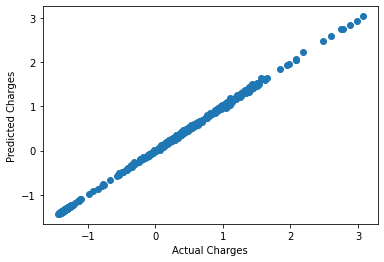

In [245]:
plt.scatter(y_test, y_pred_1)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [246]:
reg.score(X_test, y_test)

0.9996993342679675

###Gradient Descent

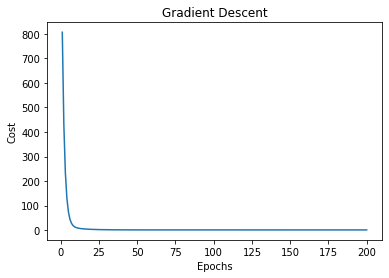

In [247]:
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

In [248]:
y_pred_2 = reg_GD.predict(X_test)

In [249]:
c = r2_score(y_test, y_pred_2)
c

0.9990913270312834